#Loan Approval - Maximum Amount
**C. Renato Leyton**

Please note that the files are being uploaded to Drive and not to the local environment.

If running the code, please take in account the file names used and the path where they're saved or loaded from. Thank you.

In [ ]:
#Installing and importing Pandas
!pip install pandas

**PART A**

In [ ]:
import pandas as pd
#Loading data to a dataframe. I'll call it "rawdata" to make clear is the unprocesed data.
rawdata=pd.read_csv('/content/drive/MyDrive/DM&ML/RAW DATA/loan_approval_data.tsv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DM&ML/RAW DATA/loan_approval_data.tsv'

**EDA**

In [ ]:
#Taking a first look into the data
rawdata.head()

id   age Sex Education_Qualifications  income home_ownership  \
0  35437  21.0   M                 Unknown    12000            OWN   
1  53756  21.0   M                 Unknown    13200            OWN   
2  42205  23.0   M                 Unknown     9600           RENT   
3  19180  40.0   M                 Unknown   182004           RENT   
4  28072  40.0   M                 Unknown    90000       MORTGAGE   

   emplyment_length      loan_intent  loan_amount  loan_interest_rate  \
0                 0        EDUCATION        15000                6.99   
1                 2        EDUCATION        25000               16.77   
2                 5          MEDICAL        30000               12.42   
3                 3        EDUCATION        35000                8.00   
4                 3  HOMEIMPROVEMENT        35000               12.42   

   loan_income_ratio payment_default_on_file  credit_history_length  \
0               0.12                       N                      4   
1               0.19                       Y                      3   
2               0.31                       N                      3   
3               0.19                       N                     11   
4               0.39                       N                     14   

  loan_approval_status  max_allowed_loan  Credit_Application_Acceptance  
0             Approved          -2426900                            0.0  
1             Approved           -111739                            0.0  
2             Approved            -89000                            0.0  
3             Approved             35000                            0.0  
4             Approved             35000                            0.0

In [ ]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             58645 non-null  int64  
 1   age                            58639 non-null  float64
 2   Sex                            221 non-null    object 
 3   Education_Qualifications       58645 non-null  object 
 4   income                         58645 non-null  int64  
 5   home_ownership                 58645 non-null  int64  
 6   emplyment_length               58645 non-null  int64  
 7   loan_intent                    58645 non-null  int64  
 8   loan_amount                    58645 non-null  int64  
 9   loan_interest_rate             58634 non-null  float64
 10  loan_income_ratio              58645 non-null  float64
 11  payment_default_on_file        58640 non-null  float64
 12  credit_history_length          58645 non-null 

AGE is being incorrectly treated as object

In [ ]:
rawdata.describe(include='object').transpose()

count unique        top    freq
age                       58639.0  104.0       22.0  5903.0
Sex                           221      2          M     126
Education_Qualifications    58645      6    Unknown   58303
home_ownership              58645      4       RENT   30594
loan_intent                 58645      6  EDUCATION   12271
payment_default_on_file     58640      4          N   49933
loan_approval_status        58644      8   Approved   50210

In [ ]:
#Education_Qualifications has 58303 'Unknown' values
#We are gonna use a Pandas function observed in the following link to count the 'Unknown' values:
# https://sparkbyexamples.com/pandas/pandas-count-frequency-value-occurs-in-dataframe-column/

#The 'normalize' attribute returns the values as percentages of the total,
#so there will be no need to divide by the rawdata lenght.

rawdata['Education_Qualifications'].value_counts(normalize =True)

Education_Qualifications
Unknown             0.994168
Unknown             0.003479
Higher Education    0.001466
High School         0.000477
Apprenticeship      0.000256
College             0.000153
Name: proportion, dtype: float64

There are over 99.5% of 'Unknown' values, so we will drop the column later.

# Value Mapping

We'll check all of our object variables and map them to a int64 value where needed.

Home ownership

In [ ]:
rawdata['home_ownership'].unique()

array(['OWN', 'RENT', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
rawdata['home_ownership'] = rawdata['home_ownership'].map({'OWN': 0 , 'RENT': 1, 'MORTGAGE':2, 'OTHER':3})

Loan intent

In [ ]:
rawdata['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'HOMEIMPROVEMENT', 'VENTURE',
       'DEBTCONSOLIDATION', 'PERSONAL'], dtype=object)

In [ ]:
rawdata['loan_intent'] = rawdata['loan_intent'].map({'EDUCATION': 0 , 'MEDICAL': 1, 'PERSONAL':2, 'VENTURE':3, 'DEBTCONSOLIDATION':4, 'HOMEIMPROVEMENT':5})

Payment default on file

In [ ]:
rawdata['payment_default_on_file'].unique()

array(['N', 'Y', nan, 'NO', 'YES'], dtype=object)

In [ ]:
rawdata['payment_default_on_file'] = rawdata['payment_default_on_file'].map({'N': 0 , 'Y': 1, 'NO':0, 'YES':1})

Loan Approval Status

In [ ]:
rawdata['loan_approval_status'].unique()

array(['Approved', 'APPROVED', 'APPROVED ', 'Declined ', 'DECLINED ',
       'Reject', nan, 'Accept', 'Accept '], dtype=object)

In [ ]:
rawdata['loan_approval_status'] = rawdata['loan_approval_status'].map({'Approved':0, 'APPROVED':0, 'APPROVED ':0, 'Declined ':1, 'DECLINED ':1, 'Reject':1, 'Accept':0, 'Accept ':0})

In [ ]:
rawdata.head()

id   age Sex Education_Qualifications  income  home_ownership  \
0  35437  21.0   M                 Unknown    12000               0   
1  53756  21.0   M                 Unknown    13200               0   
2  42205  23.0   M                 Unknown     9600               1   
3  19180  40.0   M                 Unknown   182004               1   
4  28072  40.0   M                 Unknown    90000               2   

   emplyment_length  loan_intent  loan_amount  loan_interest_rate  \
0                 0            0        15000                6.99   
1                 2            0        25000               16.77   
2                 5            1        30000               12.42   
3                 3            0        35000                8.00   
4                 3            5        35000               12.42   

   loan_income_ratio  payment_default_on_file  credit_history_length  \
0               0.12                      0.0                      4   
1               0.19                      1.0                      3   
2               0.31                      0.0                      3   
3               0.19                      0.0                     11   
4               0.39                      0.0                     14   

   loan_approval_status  max_allowed_loan  Credit_Application_Acceptance  
0                   0.0          -2426900                            0.0  
1                   0.0           -111739                            0.0  
2                   0.0            -89000                            0.0  
3                   0.0             35000                            0.0  
4                   0.0             35000                            0.0

Back to the data type of AGE

In [ ]:
rawdata['age'].unique()

array([21.0, 23.0, 40.0, 20.0, 22.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0,
       30.0, 31.0, 32.0, 33.0, nan, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0,
       41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0,
       52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 61.0, 62.0, 64.0,
       65.0, 66.0, 70.0, 73.0, 76.0, 80.0, 69.0, '23', '27', '29', '25',
       '39', '22', '33', '31', '35', '26', '37', '34', '28', '21', '24',
       '46', '47', '41', '30', '49', '43', '42', '45', '38', '32', '51',
       '53', '36', '48', '52', '44', '57', '54', '62', '56', '20', '61',
       '55', '60', '58', '64', '70', '50', '59', '69', '123', '65', '66',
       '156', '-30', 'Twenty Seven', 'Twenty Three', 'Thirty', '84'],
      dtype=object)

In the previous code we noticed that some of the values are quotated, therefore being treated as objects.

We'll apply the .replace function to each one of the wrongly formatted values.

**It is a long line of code and it will be written with the help of Excel as shown:**

Using the CONCAT Excel function, we massively generate the parameters for the .replace function.

Evidence attached:

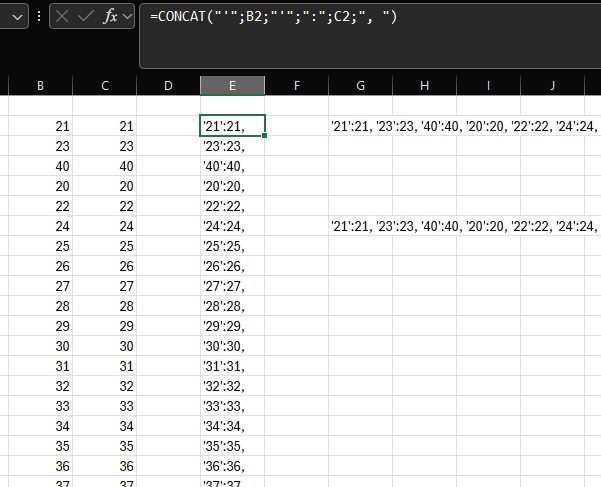

In [ ]:
#Following the guidance of the Pandas documentation, we'll replace the values. WE ARE NOT REPLACING THE NaN YET.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

rawdata['age'].replace(inplace=True, to_replace={'-30':30, 'Twenty Seven':27, 'Twenty Three':23, 'Thirty':30, '21':21, '23':23, '40':40, '20':20, '22':22, '24':24, '25':25, '26':26, '27':27, '28':28, '29':29, '30':30, '31':31, '32':32, '33':33, '34':34, '35':35, '36':36, '37':37, '38':38, '39':39, '41':41, '42':42, '43':43, '44':44, '45':45, '46':46, '47':47, '48':48, '49':49, '50':50, '51':51, '52':52, '53':53, '54':54, '55':55, '56':56, '57':57, '58':58, '60':60, '61':61, '62':62, '64':64, '65':65, '66':66, '70':70, '73':73, '76':76, '80':80, '69':69, '59':59, '123':123, '156':156, '84':84})

/tmp/ipython-input-59771994.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rawdata['age'].replace(inplace=True, to_replace={'-30':30, 'Twenty Seven':27, 'Twenty Three':23, 'Thirty':30, '21':21, '23':23, '40':40, '20':20, '22':22, '24':24, '25':25, '26':26, '27':27, '28':28, '29':29, '30':30, '31':31, '32':32, '33':33, '34':34, '35':35, '36':36, '37':37, '38':38, '39':39, '41':41, '42':42, '43':43, '44':44, '45':45, '46':46, '47':47, '48':48, '49':49, '50':50, '51':51, '52':52, '53':53, '54':54, '55':55, '56':56, '57':57, 

In [ ]:
rawdata['age'].describe()

count    58639.000000
mean        27.552738
std          6.055947
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        156.000000
Name: age, dtype: float64

Now we have the statistical data for our AGE column.

Note that we still have to drop the NaN values, but before that we'll do an analysis with the help of descriptive statistics.

**We'll use PLOTLY EXPRESS to have a look into the data distribution**

**Note:** We will use two methods to find outliers: our sight and the IQR method.

We can define the function now:

In [ ]:
def find_outliers_IQR(rawdata):
  q1=rawdata.quantile(0.25)
  q3=rawdata.quantile(0.75)
  IQR=q3-q1
  outliers = rawdata[((rawdata<(q1-1.5*IQR))|(rawdata>(q3+1.5*IQR)))]
  return outliers

**Note:** We will also use the indexes to drop outliers we find by looking at the graphs.

In [ ]:
#Import Plotly Express
import plotly.express as px

Let's explore some data relationships.

# Data Exploration
*Note that we can re-run this section after dealing with the outliers to see the changes.*

**Age vs Income**

In [ ]:
scatter_fig = px.scatter(x=rawdata['age'], y=rawdata['income'])
scatter_fig.show()

**Age vs Employment Lenght**

In [ ]:
scatter_fig = px.scatter(x=rawdata['age'], y=rawdata['emplyment_length'])
scatter_fig.show()

**Age vs Max Allowed Loan**

In [ ]:
scatter_fig = px.scatter(x=rawdata['age'], y=rawdata['max_allowed_loan'])
scatter_fig.show()

**Income vs Max Allowed Loan**

In [ ]:
scatter_fig = px.scatter(x=rawdata['income'], y=rawdata['max_allowed_loan'])
scatter_fig.show()

# Dealing with outliers

*Note that we can re-run the graphs after dropping the outliers to see the changes.*



In [ ]:
#Let's build graphs for AGE
hist = px.histogram(rawdata, x='age')
hist.show()

hist = px.box(rawdata, x='age')
hist.show()

**We immediatly notice outliers**

We'll get their indexes to drop them from the table

*The code below was generated by me, following the guidance of the mentioned sources and with my little experience with coding.*

In [ ]:
#Find index value in column, helped by the information found in the following link:
# https://www.statology.org/pandas-get-index-of-row/

rawdata.index[rawdata['age'] == 156].values[0]

np.int64(44576)

In [ ]:
rawdata.index[rawdata['age'] == 123].values[0]

np.int64(39792)

In [ ]:
#The following code was generated by ChatGPT
#GenAI was used as a last resource for troubleshooting since this code:
# rawdata.drop(rawdata.index[[...]], inplace=True)
#Was not providing the expected results

rawdata = rawdata.drop(index=[44576,39792])

Let's take a look again into the variable AGE

In [ ]:
age_hist = px.histogram(rawdata, x='age')
age_hist.show()

age_hist = px.box(rawdata, x='age')
age_hist.show()

We notice the MAX amount is not extreme. (Before we had ages above 120 years, which is logically not possible).

We stil have many values that can be considered outliers.

Let's approach the issue with the IQR

In [ ]:
def find_outliers_IQR(rawdata):
  q1=rawdata.quantile(0.25)
  q3=rawdata.quantile(0.75)
  IQR=q3-q1
  age_outliers = rawdata[((rawdata<(q1-1.5*IQR))|(rawdata>(q3+1.5*IQR)))]
  return age_outliers

In [ ]:
age_outliers = find_outliers_IQR(rawdata['age'])
print("number of outliers: "+ str(len(age_outliers)))

number of outliers: 2444


If we use the IQR rule with a constant of **1.5**, the outcome is a large number of outliers. Let's change the constant to avoid dropping a consderable amount of data.

For this, we'll create an specific function to find outliers for the AGE variable.

In [ ]:
def find_age_outliers_IQR(rawdata):
  q1=rawdata.quantile(0.25)
  q3=rawdata.quantile(0.75)
  IQR=q3-q1
  age_outliers = rawdata[((rawdata<(q1-3.5*IQR))|(rawdata>(q3+3.5*IQR)))]
  return age_outliers

In [ ]:
age_outliers = find_age_outliers_IQR(rawdata['age'])
print("number of outliers: "+ str(len(age_outliers)))

#For the following line of code, I used ChatGPT to ask how to put the values into a list

age_index_drop_list = age_outliers.index.tolist()

number of outliers: 235


Now we pass the var ```age_index_drop_list``` to ```rawdata = rawdata.drop(index[...])```







In [ ]:
rawdata = rawdata.drop(index=age_index_drop_list)

**Let's repeat the process with the other numeric variables**

In [ ]:
#Let's build graphs for INCOME
hist = px.histogram(rawdata, x='income')
hist.show()

hist = px.box(rawdata, x='income')
hist.show()

The mean might be being affected by the extreme outliers, so we'll drop them first.

In [ ]:
#We'll drop the values equal or higher to 1.2M
index_to_drop = rawdata.index[rawdata['income'] >= 1200000].tolist()
index_to_drop

[58640, 58641, 58642, 58643, 58644]

In [ ]:
rawdata = rawdata.drop(index=index_to_drop)

Now we will use the IQR method, iterating through different constant values.

In [ ]:
def find_income_outliers_IQR(rawdata):
  q1=rawdata.quantile(0.25)
  q3=rawdata.quantile(0.75)
  IQR=q3-q1
  income_outliers = rawdata[((rawdata<(q1-3*IQR))|(rawdata>(q3+3*IQR)))]
  return income_outliers

In [ ]:
income_outliers = find_income_outliers_IQR(rawdata['income'])
print("number of outliers: "+ str(len(income_outliers)))

income_index_drop_list = income_outliers.index.tolist()

number of outliers: 524


In [ ]:
rawdata = rawdata.drop(index=income_index_drop_list)

In [ ]:
#Let's build graphs for EMPLOYMENT LENGHT
hist = px.histogram(rawdata, x='emplyment_length')
hist.show()

hist = px.box(rawdata, x='emplyment_length')
hist.show()

In [ ]:
def find_employment_outliers_IQR(rawdata):
  q1=rawdata.quantile(0.25)
  q3=rawdata.quantile(0.75)
  IQR=q3-q1
  employment_outliers = rawdata[((rawdata<(q1-2.5*IQR))|(rawdata>(q3+2.5*IQR)))]
  return employment_outliers

In [ ]:
employment_outliers = find_employment_outliers_IQR(rawdata['emplyment_length'])
print("number of outliers: "+ str(len(employment_outliers)))

employment_index_drop_list = employment_outliers.index.tolist()

number of outliers: 219


In [ ]:
rawdata = rawdata.drop(index=employment_index_drop_list)

In [ ]:
#Let's build graphs for LOAN AMOUNT
hist = px.histogram(rawdata, x='loan_amount')
hist.show()

hist = px.box(rawdata, x='loan_amount')
hist.show()

In [ ]:
def find_lamount_outliers_IQR(rawdata):
  q1=rawdata.quantile(0.25)
  q3=rawdata.quantile(0.75)
  IQR=q3-q1
  lamount_outliers = rawdata[((rawdata<(q1-2*IQR))|(rawdata>(q3+2*IQR)))]
  return lamount_outliers

In [ ]:
lamount_outliers = find_lamount_outliers_IQR(rawdata['loan_amount'])
print("number of outliers: "+ str(len(lamount_outliers)))

lamount_index_drop_list = lamount_outliers.index.tolist()

number of outliers: 301


In [ ]:
rawdata = rawdata.drop(index=lamount_index_drop_list)

In [ ]:
#Let's build graphs for LOAN INTEREST RATE
hist = px.histogram(rawdata, x='loan_interest_rate')
hist.show()

hist = px.box(rawdata, x='loan_interest_rate')
hist.show()

In [ ]:
def find_interest_outliers_IQR(rawdata):
  q1=rawdata.quantile(0.25)
  q3=rawdata.quantile(0.75)
  IQR=q3-q1
  interest_outliers = rawdata[((rawdata<(q1-1.5*IQR))|(rawdata>(q3+1.5*IQR)))]
  return interest_outliers

In [ ]:
interest_outliers = find_interest_outliers_IQR(rawdata['loan_interest_rate'])
print("number of outliers: "+ str(len(interest_outliers)))

interest_index_drop_list = interest_outliers.index.tolist()

number of outliers: 42


In [ ]:
rawdata = rawdata.drop(index=interest_index_drop_list)

In [ ]:
#Let's build graphs for CREDIT HISTORY LENGHT
hist = px.histogram(rawdata, x='credit_history_length')
hist.show()

hist = px.box(rawdata, x='credit_history_length')
hist.show()

In [ ]:
def find_history_outliers_IQR(rawdata):
  q1=rawdata.quantile(0.25)
  q3=rawdata.quantile(0.75)
  IQR=q3-q1
  history_outliers = rawdata[((rawdata<(q1-1.9*IQR))|(rawdata>(q3+1.9*IQR)))]
  return history_outliers

In [ ]:
history_outliers = find_history_outliers_IQR(rawdata['credit_history_length'])
print("number of outliers: "+ str(len(history_outliers)))

history_index_drop_list = history_outliers.index.tolist()

number of outliers: 239


In [ ]:
rawdata = rawdata.drop(index=history_index_drop_list)

In [ ]:
#Let's build graphs for MAXIMUM ALLOWED LOAN
hist = px.histogram(rawdata, x='max_allowed_loan')
hist.show()

hist = px.box(rawdata, x='max_allowed_loan')
hist.show()

**We have an extreme value of 12467989660 that we will drop manually since it may be affecting the mean in a huge extent.**

In [ ]:
index_to_drop = rawdata.index[rawdata['max_allowed_loan'] == 12467989660]
index_to_drop

Index([49814], dtype='int64')

In [ ]:
rawdata = rawdata.drop(index=49814)

In [ ]:
#Let's plot the graphs again

hist = px.histogram(rawdata, x='max_allowed_loan')
hist.show()

hist = px.box(rawdata, x='max_allowed_loan')
hist.show()

In [ ]:
def find_maxloan_outliers_IQR(rawdata):
  q1=rawdata.quantile(0.25)
  q3=rawdata.quantile(0.75)
  IQR=q3-q1
  maxloan_outliers = rawdata[((rawdata<(q1-1.7*IQR))|(rawdata>(q3+1.7*IQR)))]
  return maxloan_outliers

In [ ]:
maxloan_outliers = find_maxloan_outliers_IQR(rawdata['max_allowed_loan'])
print("number of outliers: "+ str(len(maxloan_outliers)))

maxloan_index_drop_list = maxloan_outliers.index.tolist()

number of outliers: 1359


In [ ]:
rawdata = rawdata.drop(index=maxloan_index_drop_list)

**We have dropped the outliers from our numeric variables while trying to not drop a big amount of data**

# Dealing with missing data

Now let's check on the null data

In [ ]:
rawdata.describe(include='object').transpose()

count unique      top   freq
Sex                         197      2        M    107
Education_Qualifications  55718      6  Unknown  55400

In [ ]:
rawdata.isna().sum()/len(rawdata)*100

id                                0.000000
age                               0.010769
Sex                              99.646434
Education_Qualifications          0.000000
income                            0.000000
home_ownership                    0.000000
emplyment_length                  0.000000
loan_intent                       0.000000
loan_amount                       0.000000
loan_interest_rate                0.017948
loan_income_ratio                 0.000000
payment_default_on_file           0.008974
credit_history_length             0.000000
loan_approval_status              0.001795
max_allowed_loan                  0.000000
Credit_Application_Acceptance     0.001795
dtype: float64

Sex and Education have over 99.5% of null values (or Unknown in the case of Education). We'll drop both columns.

**Let's continue by dropping the columns we are not considering for the analysis until this point**

In [ ]:
rawdata.drop(['id', 'Sex', 'Education_Qualifications', 'loan_income_ratio','Credit_Application_Acceptance'],axis=1, inplace=True)
rawdata.head()

age  income  home_ownership  emplyment_length  loan_intent  loan_amount  \
6   40.0  150000               2                 9            4        25000   
7   40.0  132000               2                 3            5        25000   
8   40.0   80000               2                 2            4        25000   
9   40.0   80000               2                 9            3        25000   
10  40.0   60000               0                 5            3        25000   

    loan_interest_rate  payment_default_on_file  credit_history_length  \
6                11.89                      0.0                     11   
7                16.82                      0.0                     17   
8                10.25                      0.0                     11   
9                18.67                      0.0                     17   
10               11.97                      1.0                     12   

    loan_approval_status  max_allowed_loan  
6                    0.0             25000  
7                    0.0             25000  
8                    0.0             25000  
9                    0.0             25000  
10                   0.0             25000

**Let's use some logic:**

If in the "worst" of cases each missing value represents one observation, the sum of the percentages represents the amount of observations we will drop, so let's do the math:

In [ ]:
sum(rawdata.isna().sum()/len(rawdata)*100)

0.03948454718403389

**We will be dropping 0.039%.**

**To tell if it's safe to drop this amount of observations, let's take a look at how much information we have dropped so far:**

In [ ]:
# (1-(current amount of rows / the original amount of rows)) * 100

(1-(len(rawdata)/58645))*100

4.991047830164552

**We have dropped 4.99% of data so far, therefore it is safe to drop an additional 0.03% since we are still around the acceptable 5% of data removal.**

So we proceed to drop the observations with null values.

In [ ]:
rawdata = rawdata.dropna()
rawdata.isna().sum()

age                        0
income                     0
home_ownership             0
emplyment_length           0
loan_intent                0
loan_amount                0
loan_interest_rate         0
payment_default_on_file    0
credit_history_length      0
loan_approval_status       0
max_allowed_loan           0
dtype: int64

In [ ]:
rawdata.head()

age  income  home_ownership  emplyment_length  loan_intent  loan_amount  \
6   40.0  150000               2                 9            4        25000   
7   40.0  132000               2                 3            5        25000   
8   40.0   80000               2                 2            4        25000   
9   40.0   80000               2                 9            3        25000   
10  40.0   60000               0                 5            3        25000   

    loan_interest_rate  payment_default_on_file  credit_history_length  \
6                11.89                      0.0                     11   
7                16.82                      0.0                     17   
8                10.25                      0.0                     11   
9                18.67                      0.0                     17   
10               11.97                      1.0                     12   

    loan_approval_status  max_allowed_loan  
6                    1.0             25000  
7                    1.0             25000  
8                    1.0             25000  
9                    1.0             25000  
10                   1.0             25000

In [ ]:
#I'll suppress the scientific notation following the guidance in the following link:

# https://www.statology.org/pandas-describe-no-scientific-notation/
#I choose to set the decimal numbers to two

rawdata.describe().apply(lambda x: x.apply('{0:.2f}'.format)).transpose()

count      mean       std      min       25%  \
age                      55696.00     27.07      5.24    20.00     23.00   
income                   55696.00  60085.82  24955.93  4200.00  41000.00   
home_ownership           55696.00      1.36      0.58     0.00      1.00   
emplyment_length         55696.00      4.57      3.67     0.00      2.00   
loan_intent              55696.00      2.18      1.66     0.00      1.00   
loan_amount              55696.00   8960.31   5201.18   500.00   5000.00   
loan_interest_rate       55696.00     10.68      3.02     5.42      7.88   
payment_default_on_file  55696.00      0.15      0.36     0.00      0.00   
credit_history_length    55696.00      5.52      3.59     2.00      3.00   
loan_approval_status     55696.00      0.14      0.35     0.00      0.00   
max_allowed_loan         55696.00  63413.58  41608.11     0.00  37224.00   

                              50%       75%        max  
age                         26.00     29.00      52.00  
income                   55660.00  75000.00  175500.00  
home_ownership               1.00      2.00       3.00  
emplyment_length             4.00      7.00      19.00  
loan_intent                  2.00      4.00       5.00  
loan_amount               8000.00  12000.00   26000.00  
loan_interest_rate          10.75     12.99      20.62  
payment_default_on_file      0.00      0.00       1.00  
credit_history_length        4.00      8.00      17.00  
loan_approval_status         0.00      0.00       1.00  
max_allowed_loan         60723.00  87985.00  180976.00

Converting Categorical variables from 'float' to 'category'

In [ ]:
rawdata['loan_approval_status'] = rawdata['loan_approval_status'].astype('category')
rawdata['payment_default_on_file'] = rawdata['payment_default_on_file'].astype('category')
rawdata['home_ownership'] = rawdata['home_ownership'].astype('category')
rawdata['loan_intent'] = rawdata['loan_intent'].astype('category')

In [ ]:
rawdata.describe(include='category').transpose()

count  unique  top     freq
home_ownership           55696.0     4.0  1.0  29712.0
loan_intent              55696.0     6.0  0.0  11880.0
payment_default_on_file  55696.0     2.0  0.0  47420.0
loan_approval_status     55696.0     2.0  0.0  47625.0

In [ ]:
rawdata.describe().transpose()

count          mean           std      min       25%  \
age                    55696.0     27.070598      5.235316    20.00     23.00   
income                 55696.0  60085.816989  24955.929170  4200.00  41000.00   
home_ownership         55696.0      1.361247      0.583486     0.00      1.00   
emplyment_length       55696.0      4.571441      3.667228     0.00      2.00   
loan_intent            55696.0      2.182975      1.657235     0.00      1.00   
loan_amount            55696.0   8960.305982   5201.178463   500.00   5000.00   
loan_interest_rate     55696.0     10.675594      3.023496     5.42      7.88   
credit_history_length  55696.0      5.523377      3.588046     2.00      3.00   
max_allowed_loan       55696.0  63413.583327  41608.107206     0.00  37224.00   

                            50%       75%        max  
age                       26.00     29.00      52.00  
income                 55660.00  75000.00  175500.00  
home_ownership             1.00      2.00       3.00  
emplyment_length           4.00      7.00      19.00  
loan_intent                2.00      4.00       5.00  
loan_amount             8000.00  12000.00   26000.00  
loan_interest_rate        10.75     12.99      20.62  
credit_history_length      4.00      8.00      17.00  
max_allowed_loan       60723.00  87985.00  180976.00

In [ ]:
# Construct the histogram plot for the Loan Approval Status
Approval_Status_fig = px.histogram(rawdata, x='loan_approval_status')

# Display the plot
Approval_Status_fig.show()

In [ ]:
# Construct the histogram plot for the Max Allowed Loan
Max_allowed_amount_fig = px.histogram(rawdata, x='max_allowed_loan')

# Display the plot
Max_allowed_amount_fig.show()

# Exporting our Prepared Dataset

We'll save the clean dataset to a new file to be able to reload at any point if necessary.

In [ ]:
rawdata.to_csv(r'/content/drive/MyDrive/DM&ML/PREPARED DATA/PREPARED_loan_approval_data.csv', index=False)

Now we will separate our datasets for the Classification and Regression problems

In [ ]:
prepared_classification = pd.read_csv(r'/content/drive/MyDrive/DM&ML/PREPARED DATA/PREPARED_loan_approval_data.csv')

In [ ]:
prepared_classification.drop('max_allowed_loan',axis=1, inplace=True)
prepared_classification.head()

age  income  home_ownership  emplyment_length  loan_intent  loan_amount  \
0  40.0  150000               2                 9            4        25000   
1  40.0  132000               2                 3            5        25000   
2  40.0   80000               2                 2            4        25000   
3  40.0   80000               2                 9            3        25000   
4  40.0   60000               0                 5            3        25000   

   loan_interest_rate  payment_default_on_file  credit_history_length  \
0               11.89                      0.0                     11   
1               16.82                      0.0                     17   
2               10.25                      0.0                     11   
3               18.67                      0.0                     17   
4               11.97                      1.0                     12   

   loan_approval_status  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [ ]:
prepared_classification.drop('loan_interest_rate',axis=1, inplace=True)
prepared_classification.head()

age  income  home_ownership  emplyment_length  loan_intent  loan_amount  \
0  40.0  150000               2                 9            4        25000   
1  40.0  132000               2                 3            5        25000   
2  40.0   80000               2                 2            4        25000   
3  40.0   80000               2                 9            3        25000   
4  40.0   60000               0                 5            3        25000   

   payment_default_on_file  credit_history_length  loan_approval_status  
0                      0.0                     11                   0.0  
1                      0.0                     17                   0.0  
2                      0.0                     11                   0.0  
3                      0.0                     17                   0.0  
4                      1.0                     12                   0.0

In [ ]:
prepared_classification.describe().transpose()

count          mean           std     min      25%  \
age                      55696.0     27.070598      5.235316    20.0     23.0   
income                   55696.0  60085.816989  24955.929170  4200.0  41000.0   
home_ownership           55696.0      1.361247      0.583486     0.0      1.0   
emplyment_length         55696.0      4.571441      3.667228     0.0      2.0   
loan_intent              55696.0      2.182975      1.657235     0.0      1.0   
loan_amount              55696.0   8960.305982   5201.178463   500.0   5000.0   
payment_default_on_file  55696.0      0.148592      0.355689     0.0      0.0   
credit_history_length    55696.0      5.523377      3.588046     2.0      3.0   
loan_approval_status     55696.0      0.144912      0.352015     0.0      0.0   

                             50%      75%       max  
age                         26.0     29.0      52.0  
income                   55660.0  75000.0  175500.0  
home_ownership               1.0      2.0       3.0  
emplyment_length             4.0      7.0      19.0  
loan_intent                  2.0      4.0       5.0  
loan_amount               8000.0  12000.0   26000.0  
payment_default_on_file      0.0      0.0       1.0  
credit_history_length        4.0      8.0      17.0  
loan_approval_status         0.0      0.0       1.0

In [ ]:
prepared_classification.to_csv(r'/content/drive/MyDrive/DM&ML/PREPARED DATA/PART A - Classification/loan_approval_status_data.csv', index=False)

Preparing Regression database

In [ ]:
prepared_regression = pd.read_csv(r'/content/drive/MyDrive/DM&ML/PREPARED DATA/PREPARED_loan_approval_data.csv')

In [ ]:
prepared_regression.head()

age  income  home_ownership  emplyment_length  loan_intent  loan_amount  \
0  40.0  150000               2                 9            4        25000   
1  40.0  132000               2                 3            5        25000   
2  40.0   80000               2                 2            4        25000   
3  40.0   80000               2                 9            3        25000   
4  40.0   60000               0                 5            3        25000   

   loan_interest_rate  payment_default_on_file  credit_history_length  \
0               11.89                      0.0                     11   
1               16.82                      0.0                     17   
2               10.25                      0.0                     11   
3               18.67                      0.0                     17   
4               11.97                      1.0                     12   

   loan_approval_status  max_allowed_loan  
0                   0.0             25000  
1                   0.0             25000  
2                   0.0             25000  
3                   0.0             25000  
4                   0.0             25000

In [ ]:
approved_loan_applicants = prepared_regression[(prepared_regression.loan_approval_status < 1)]

In [ ]:
approved_loan_applicants.drop('loan_approval_status',axis=1, inplace=True)

/tmp/ipython-input-841556731.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
approved_loan_applicants.describe().transpose()

count          mean           std      min  \
age                      47625.0     27.062005      5.196164    20.00   
income                   47625.0  62232.343811  24987.380723  4200.00   
home_ownership           47625.0      1.393092      0.603755     0.00   
emplyment_length         47625.0      4.734971      3.686640     0.00   
loan_intent              47625.0      2.151706      1.649100     0.00   
loan_amount              47625.0   8623.341354   4961.945401   500.00   
loan_interest_rate       47625.0     10.249266      2.815968     5.42   
payment_default_on_file  47625.0      0.120840      0.325945     0.00   
credit_history_length    47625.0      5.522163      3.571234     2.00   
max_allowed_loan         47625.0  74160.271643  35037.675343   232.00   

                              25%       50%       75%        max  
age                         23.00     26.00     29.00      52.00  
income                   44000.00  60000.00  75000.00  175500.00  
home_ownership               1.00      1.00      2.00       3.00  
emplyment_length             2.00      4.00      7.00      19.00  
loan_intent                  1.00      2.00      3.00       5.00  
loan_amount               5000.00   7875.00  11800.00   26000.00  
loan_interest_rate           7.51     10.39     12.42      20.11  
payment_default_on_file      0.00      0.00      0.00       1.00  
credit_history_length        3.00      4.00      8.00      17.00  
max_allowed_loan         48135.00  67473.00  93972.00  180976.00

In [ ]:
approved_loan_applicants.to_csv(r'/content/drive/MyDrive/DM&ML/PREPARED DATA/PART B - Regression/loan_max_amount_data.csv', index=False)